In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [83]:
dataset = pd.read_csv('dataset.csv')

In [84]:
test = dataset

In [85]:
name = "degree_p"

In [86]:
if name == "workex":
    test.loc[test[name] <=0, name] += 2
else:
    test.loc[test[name] <=80, name] += 20

In [87]:
unemployment = dataset['status'] == 0

unemployment_rate = unemployment.mean().round(4) * 100

In [88]:
unemployment_rate

32.84

In [89]:
placed = dataset["status"] == 1
placed = placed.astype(int)
rejected = dataset["status"] == 0
rejected = rejected.astype(int)

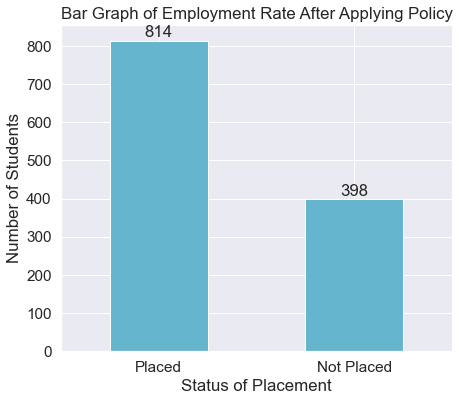

In [90]:
status = dataset['status'].value_counts()
plt.figure(figsize=(7, 6))
ax = status.plot(kind='bar', rot=0, color="c")
ax.set_title("Bar Graph of Employment Rate After Applying Policy", y = 1)
ax.set_xlabel('Status of Placement')
ax.set_ylabel('Number of Students')
ax.set_xticklabels(('Placed', 'Not Placed'))

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    
plt.show()

In [91]:
x = dataset.loc[:,dataset.columns!='status'] # all features are used
y = dataset.loc[:, 'status'] # label is status of placement
x2 = test.loc[:,dataset.columns!='status'] # all features are used


In [92]:
sc= StandardScaler()
x_scaled = sc.fit_transform(x) # for standardising the features
x_scaled = pd.DataFrame(x_scaled)
sc= StandardScaler()
x2_scaled = sc.fit_transform(x2) # for standardising the features
x2_scaled = pd.DataFrame(x2_scaled)

In [93]:
x_train,x_test, y_train, y_test = train_test_split(x_scaled,y,test_size=0.18, random_state=0)

In [94]:
lr = LogisticRegression()

In [95]:
lr.fit(x_train, y_train)

LogisticRegression()

In [96]:
y_pred = lr.predict(x_test)

In [97]:
y_pred2= lr.predict(x2_scaled)

In [98]:
x2["status"] = y_pred2

In [99]:
unemployment = y_pred2 == 0

unemployment_rate = unemployment.mean().round(4) * 100
unemployment_rate

29.95

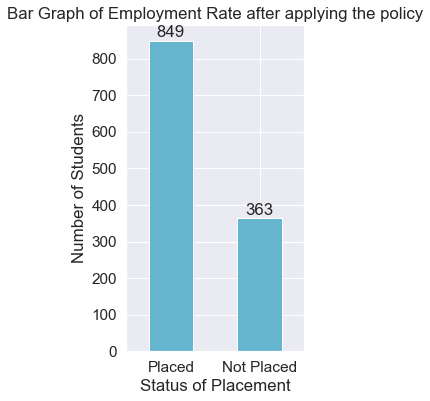

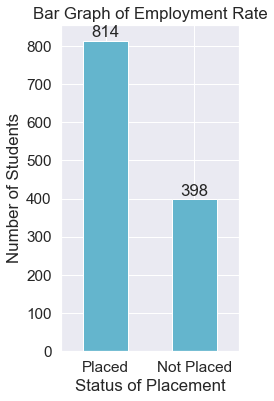

In [102]:
status = x2['status'].value_counts()
plt.figure(figsize=(7, 6))

plt.subplot(1, 2, 1)
ax = status.plot(kind='bar', rot=0, color="c")

ax.set_title("Bar Graph of Employment Rate after applying the policy", y = 1)
ax.set_xlabel('Status of Placement')
ax.set_ylabel('Number of Students')
ax.set_xticklabels(('Placed', 'Not Placed'))

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    


status = dataset['status'].value_counts()
plt.figure(figsize=(7, 6))
plt.subplot(1, 2, 2)
ax = status.plot(kind='bar', rot=0, color="c")
ax.set_title("Bar Graph of Employment Rate", y = 1)
ax.set_xlabel('Status of Placement')
ax.set_ylabel('Number of Students')
ax.set_xticklabels(('Placed', 'Not Placed'))

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center', va='bottom')    

plt.show()

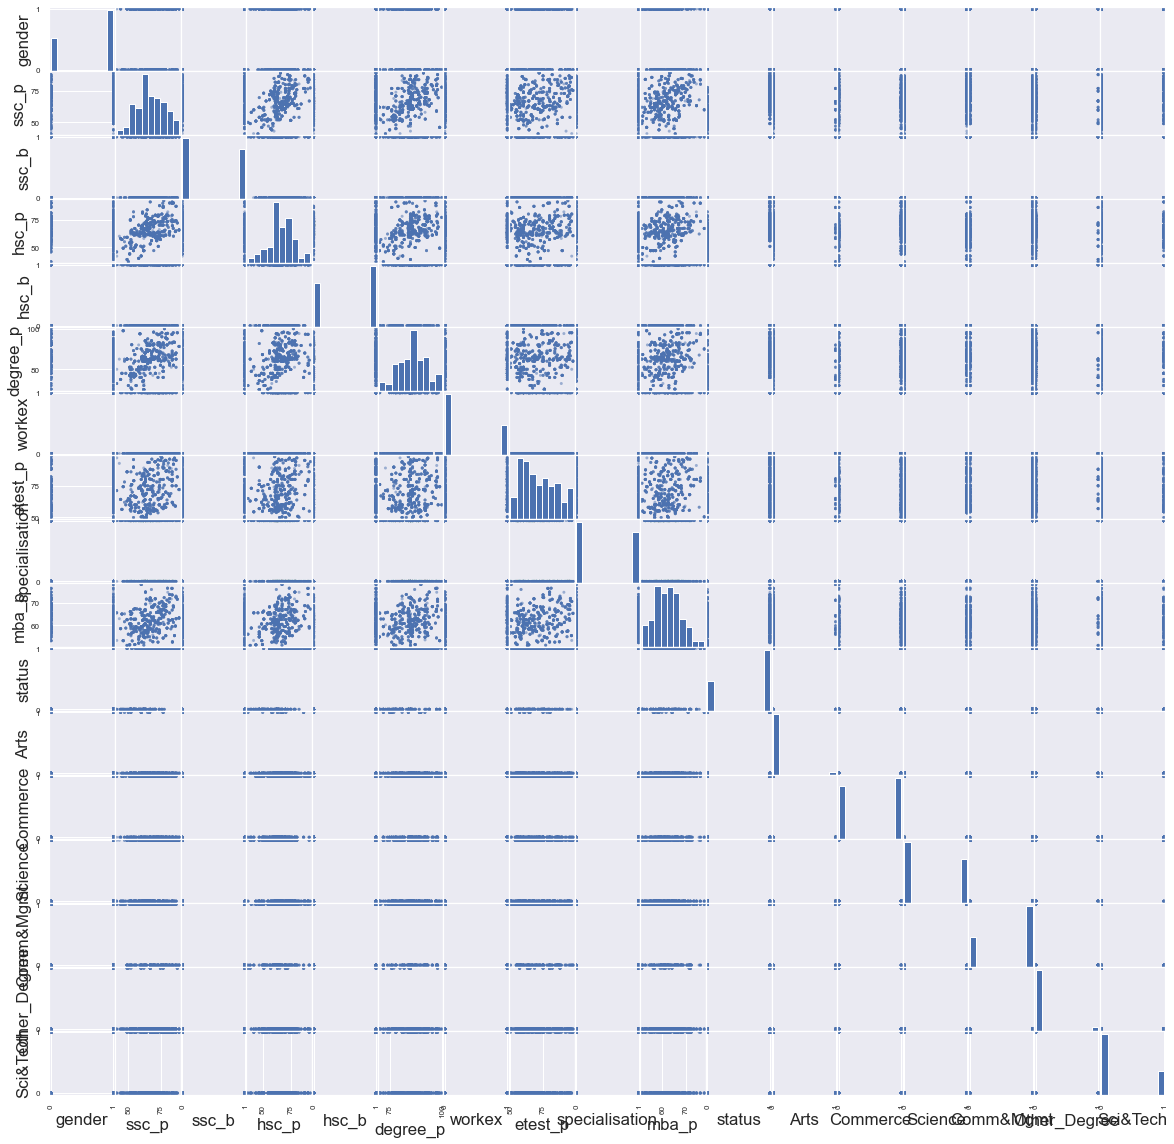

In [101]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset,figsize=(20,20))
plt.show()

In [76]:
results = dataset["degree_p"]
results = pd.DataFrame(results)
results["etest_p"] = dataset["etest_p"]
results["workex"] = dataset["workex"]
results["status"] = dataset["status"]
results

,degree_p,etest_p,workex,status
0,78.00,55.0,0.0,1.0
1,97.48,86.5,1.0,1.0
2,84.00,75.0,0.0,1.0
3,72.00,66.0,0.0,0.0
4,93.30,96.8,0.0,1.0
...,...,...,...,...
1207,76.00,80.0,1.0,1.0
1208,76.20,67.0,0.0,0.0
1209,88.00,64.0,0.0,1.0
1210,98.00,95.5,0.0,1.0


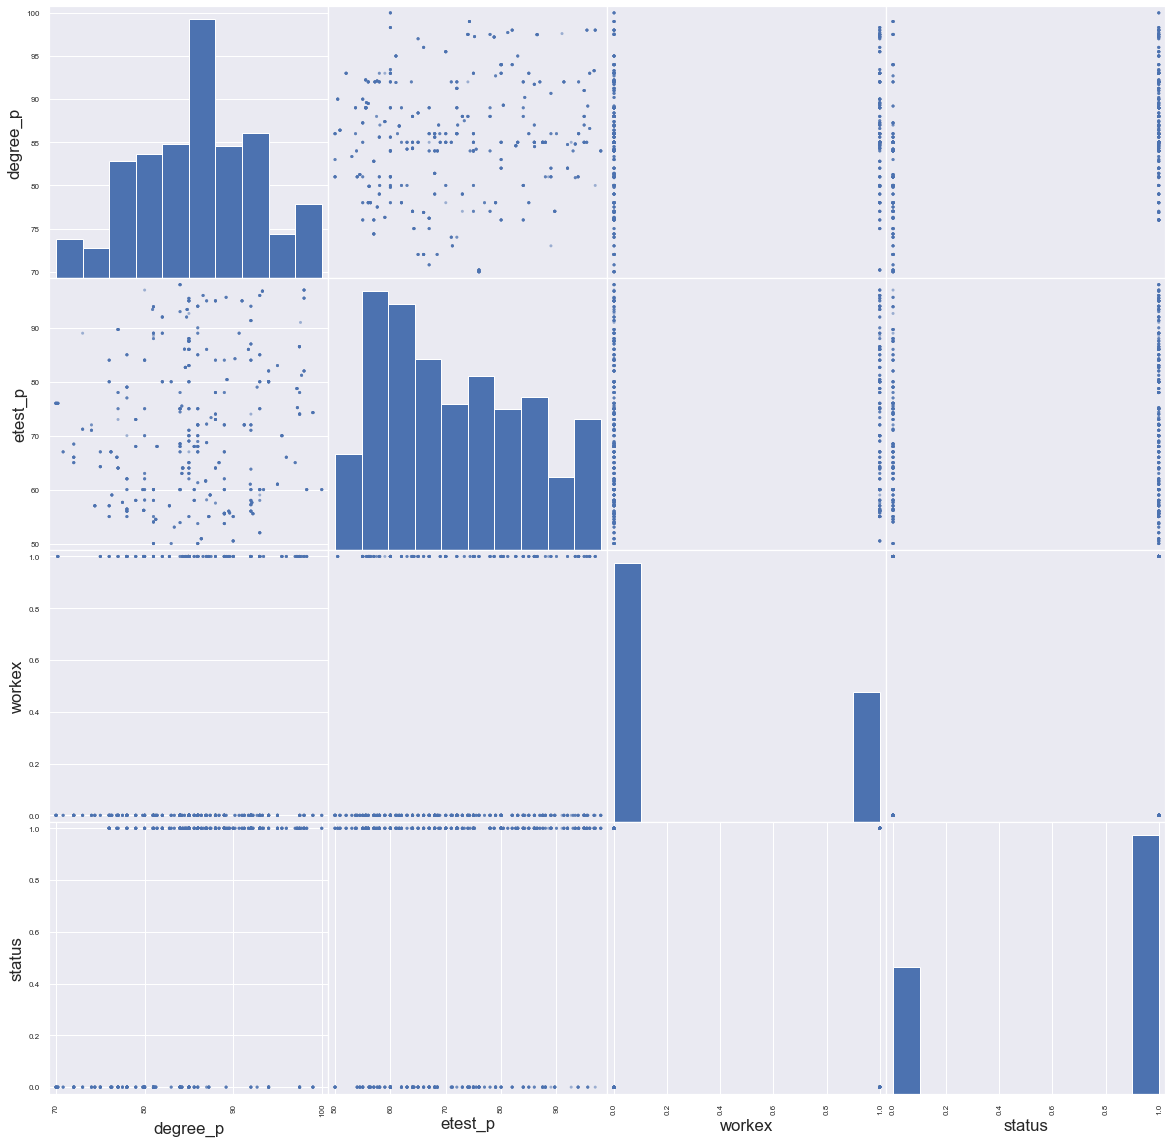

In [77]:
from pandas.plotting import scatter_matrix
scatter_matrix(results,figsize=(20,20))
plt.show()

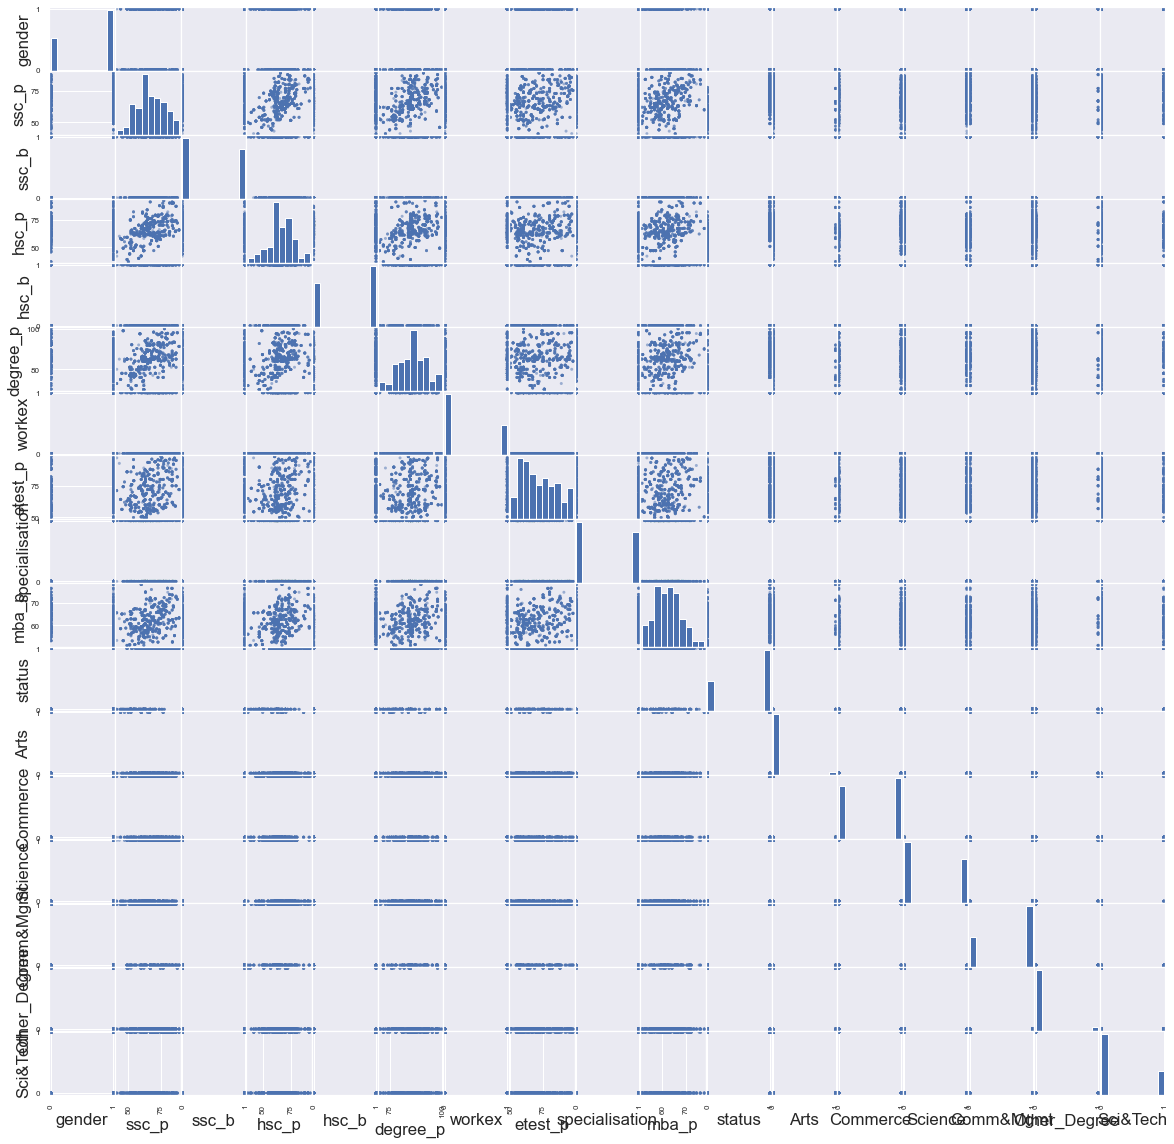

In [78]:
from pandas.plotting import scatter_matrix
scatter_matrix(test,figsize=(20,20))
plt.show()

In [80]:
results1 = test["degree_p"]
results1 = pd.DataFrame(results)
results1["etest_p"] = test["etest_p"]
results1["workex"] = test["workex"]
results1["status"] = test["status"]
results1

,degree_p,etest_p,workex,status
0,78.00,55.0,0.0,1.0
1,97.48,86.5,1.0,1.0
2,84.00,75.0,0.0,1.0
3,72.00,66.0,0.0,0.0
4,93.30,96.8,0.0,1.0
...,...,...,...,...
1207,76.00,80.0,1.0,1.0
1208,76.20,67.0,0.0,0.0
1209,88.00,64.0,0.0,1.0
1210,98.00,95.5,0.0,1.0


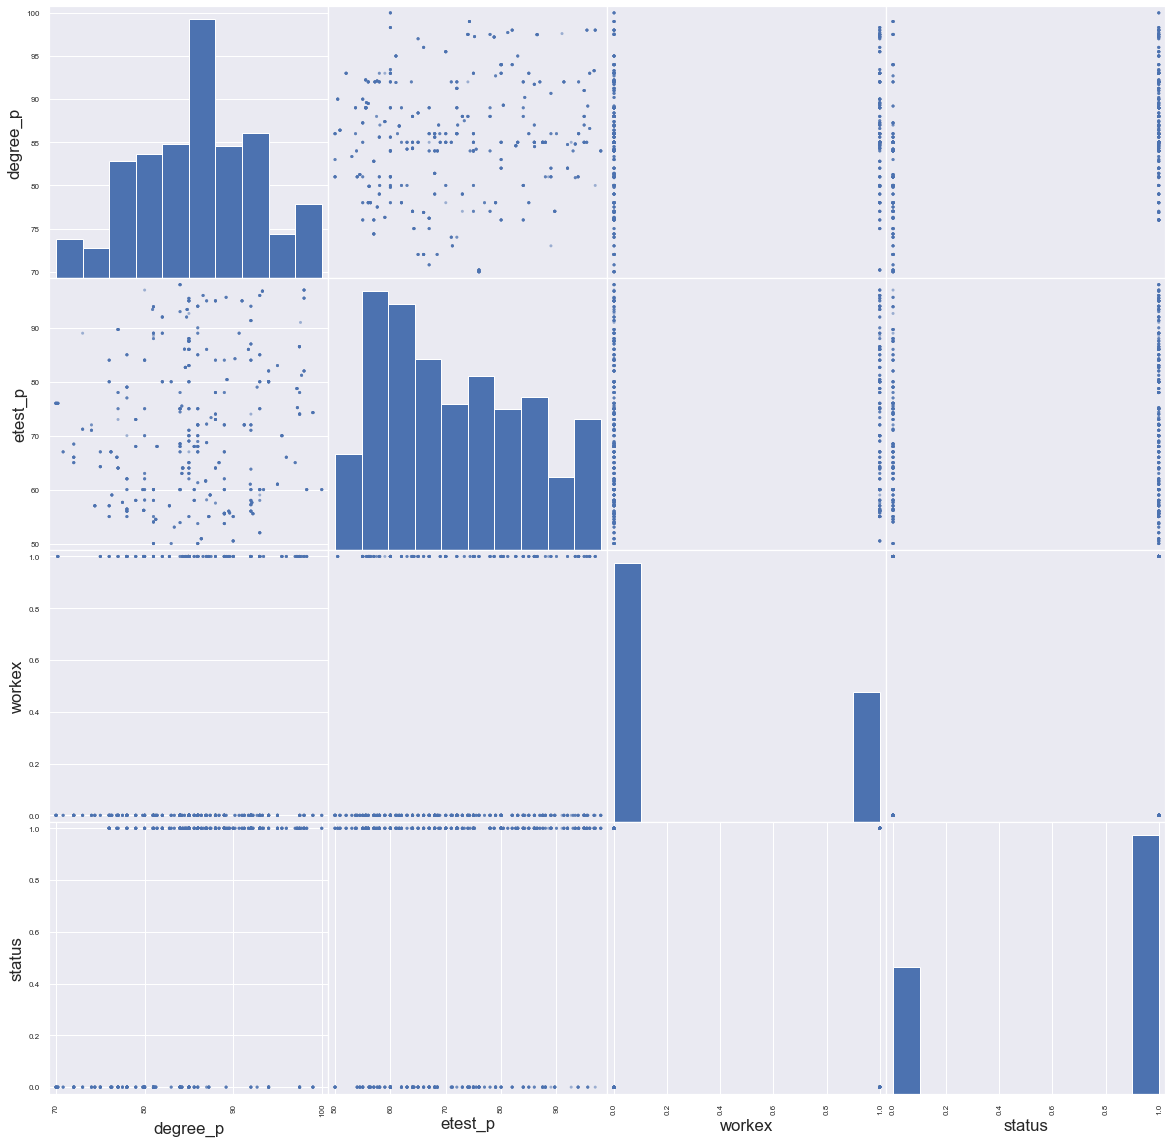

In [81]:
from pandas.plotting import scatter_matrix
scatter_matrix(results1,figsize=(20,20))
plt.show()